16. q15 years using ML y q25 yearly compensation
¿Cuál es la remuneración económica en función de la experiencia en ML?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sidetable
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# Cargo un df con los datos seleccionados
df = pd.read_csv('data_seleccionada.csv', index_col = 0)
df.head(2)

,q_1_age,q_2_gender,q_5_role,q_7_coding_languages_used,q_8_coding_languages_recommended,q_15_years_using_ml,q_20_industry,q_21_company_size,q_22_ds_team_size,q_23_current_use_of_ml,q_24_main_activities_work,q_25_yearly_compensation,q_26_ml_invested_money,q_41_primary_da_tool,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other
0,50-54,Man,Other,"Python, R",Python,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),None of these activities are an important par...,"25,000-29,999",$100-$999,"Local development environments (RStudio, Jupyt...",Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Program/Project Manager,"SQL, C, C++, Java",Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,Build and/or run the data infrastructure that...,"60,000-69,999",$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)",NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Subset con las columnas que interesan para responder a la pregunta
df2 = df[['q_15_years_using_ml', 'q_25_yearly_compensation']]
df2.head(2)

,q_15_years_using_ml,q_25_yearly_compensation
0,5-10 years,"25,000-29,999"
1,< 1 year,"60,000-69,999"


#### Esta pregunta, sin el contexto por paises, no va a tener mucho sentido

In [5]:
# Incluyendo la columna de country en los datos
df_country = pd.read_csv('../../HU1-Conversión-csv-y-Unión/data/data_txt_clean.txt', sep = ';', index_col = 0)
df_country.head()

,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
index,,,,,,,,,,,,,,,,,,,,,,,,,,
0,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None
1,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,"60,000-69,999",$0 ($USD),NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN,NaN
2,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,A laptop,Never,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",0,I do not know,$0-999,$0 ($USD),MySQL,NaN,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Other,Matplotlib,NaN,NaN,None of these activities are an important par...,"MySQL , MongoDB",None
3,Mexico,Doctoral degree,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,5-10 years,Academics/Education,"1000-9,999 employees",0,I do not know,"30,000-39,999",$0 ($USD),NaN,NaN,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",NVIDIA GPUs,Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",Do research that advances the state of the ar...,NaN,NaN
4,India,Doctoral degree,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,10-20 years,Academics/Education,50-249 employees,5-9,We use ML methods for generating insights (but...,"30,000-39,999","$1000-$9,999",NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,None,Microsoft Power BI


In [6]:
# Hay muchos países, vemos cuáles están más representados
df_countries = df_country['Q3'].reset_index()
df_countries.stb.freq(['Q3'], thresh=70)

/home/chloeiris/anaconda3/lib/python3.9/site-packages/sidetable/sidetable.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results[results[other_label] == False].append(


,Q3,count,percent,cumulative_count,cumulative_percent
0,India,7434,28.622031,7434,28.622031
1,United States of America,2650,10.202903,10084,38.824934
2,Other,1270,4.889693,11354,43.714627
3,Japan,921,3.545990,12275,47.260617
4,China,814,3.134024,13089,50.394641
5,Brazil,751,2.891464,13840,53.286105
6,Russia,742,2.856813,14582,56.142918
7,Nigeria,702,2.702807,15284,58.845724
8,United Kingdom of Great Britain and Northern I...,550,2.117584,15834,60.963308
9,Pakistan,530,2.040581,16364,63.003889


In [7]:
# Filtrando por los países más representados
df_freq_countries= df_countries[df_countries['Q3'].isin(['India','United States of America',
                                                        'Japan','China','Brazil', 'Russia',
                                                        'Nigeria', 'United Kingdom of Great Britain and Northern Ireland',
                                                        'Pakistan', 'Egypt','Germany','Spain'])]

In [8]:
# Vamos a mapear esta columna para que los valores no sean tan largos
map={'India':'India',
'United States of America':'USA',
'Japan':'Japan',
'China':'China',
'Brazil':'Brazil', 
'Russia':'Russia',
'Nigeria':'Nigeria', 
'United Kingdom of Great Britain and Northern Ireland':'UK',
'Pakistan':'Pakistan', 
'Egypt':'Egypt',
'Germany':'Germany',
'Spain':'Spain'}

In [9]:
df_freq_countries['Q3'] = df_freq_countries['Q3'].map(map)

/tmp/ipykernel_2716/2608206171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_freq_countries['Q3'] = df_freq_countries['Q3'].map(map)


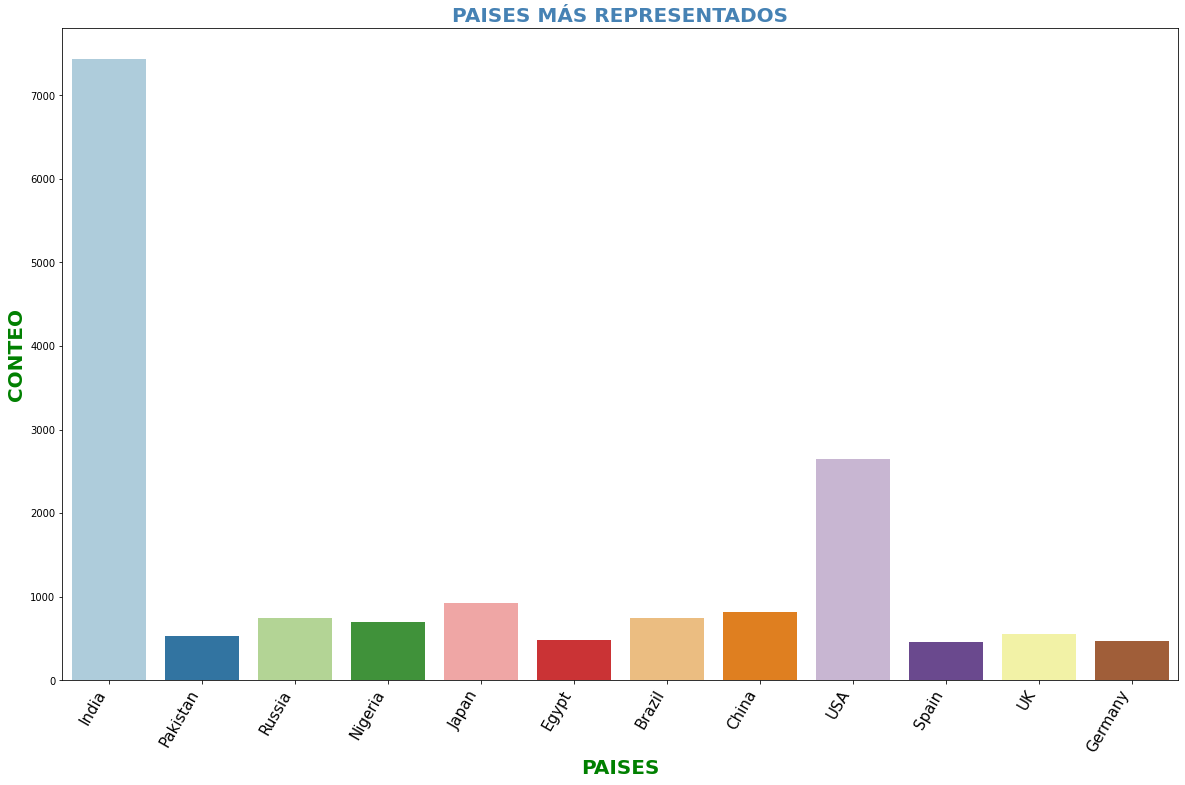

In [10]:
# Cual es la representación por paises?
plt.figure(figsize=(20,12))
fig = sns.countplot(data = df_freq_countries, x = 'Q3', palette='Paired')
plt.title("PAISES MÁS REPRESENTADOS", fontsize = 20, color = 'Steelblue', fontweight = 'bold')
plt.xlabel('PAISES', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
plt.ylabel('CONTEO', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
plt.xticks(rotation=60, fontsize=15, horizontalalignment='right')

plt.show(); 

In [11]:
# Voy a insertar la columna de países en el df inicial, para ello primero renombro la columna
new_name = {col:col.lower() + '_country' for col in df_countries.columns}
new_name

{'index': 'index_country', 'Q3': 'q3_country'}

In [12]:
df_countries.rename(columns = new_name, inplace=True)
df_countries.head(2)

,index_country,q3_country
0,0,India
1,1,Indonesia


In [13]:
# Insertando la columna en el df...(veo que el paso de renombrar no era necesario)
df.insert(2, 'q3_country', df_countries['q3_country'])

In [14]:
# Para sacar los salarios escogemos los países que más se parecen a nuestro mundo (ubicación del cliente, España)
lista_paises = ['United States of America', 'United Kingdom of Great Britain and Northern Ireland', 'Spain']

df_salarios = df.loc[(df['q3_country'].isin(lista_paises)), ['q3_country','q_15_years_using_ml', 'q_25_yearly_compensation']]
df_salarios.head()

,q3_country,q_15_years_using_ml,q_25_yearly_compensation
32,United States of America,I do not use machine learning methods,NaN
42,United States of America,3-4 years,"15,000-19,999"
44,United States of America,< 1 year,NaN
49,United States of America,4-5 years,"100,000-124,999"
51,United States of America,I do not use machine learning methods,"70,000-79,999"


In [15]:
# Nos hemos quedado solo con 3654 registros
df_salarios.shape

(3654, 3)

In [23]:
# Vamos a ver los salarios más frecuentes
df_sal_freq = df_salarios.stb.freq(['q_25_yearly_compensation','q_15_years_using_ml'], thresh= 69)
df_sal_freq

/home/chloeiris/anaconda3/lib/python3.9/site-packages/sidetable/sidetable.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results[results[other_label] == False].append(


,q_25_yearly_compensation,q_15_years_using_ml,count,percent,cumulative_count,cumulative_percent
0,"150,000-199,999",5-10 years,68,2.827443,68,2.827443
1,"100,000-124,999",< 1 year,63,2.619543,131,5.446985
2,"100,000-124,999",1-2 years,54,2.245322,185,7.692308
3,"40,000-49,999",< 1 year,52,2.162162,237,9.854470
4,$0-999,< 1 year,50,2.079002,287,11.933472
5,"100,000-124,999",3-4 years,45,1.871102,332,13.804574
6,"125,000-149,999",5-10 years,42,1.746362,374,15.550936
7,"80,000-89,999",1-2 years,40,1.663202,414,17.214137
8,"60,000-69,999",< 1 year,38,1.580042,452,18.794179
9,"50,000-59,999",< 1 year,37,1.538462,489,20.332640


> * Está todo bastante igualado, aunque lo más frecuente es tener 5-10 años de experiencia y ganar 150,000-199,999 al año
> * Dentro del 50% de lo más frecuente está también tener una experiencia de 2-3 años y ganar de 80,000-89,999

In [18]:
# Vamos a verlo en una tabla de frecuencias y en un gráfico
crosstab2 = pd.crosstab(df_salarios['q_15_years_using_ml'], df_salarios['q_25_yearly_compensation'])
crosstab2

q_25_yearly_compensation,$0-999,"$500,000-999,999","1,000-1,999","10,000-14,999","100,000-124,999","125,000-149,999","15,000-19,999","150,000-199,999","2,000-2,999","20,000-24,999","200,000-249,999","25,000-29,999","250,000-299,999","3,000-3,999","30,000-39,999","300,000-499,999","4,000-4,999","40,000-49,999","5,000-7,499","50,000-59,999","60,000-69,999","7,500-9,999","70,000-79,999","80,000-89,999","90,000-99,999",">$1,000,000"
q_15_years_using_ml,,,,,,,,,,,,,,,,,,,,,,,,,,
1-2 years,29,2,6,5,54,28,5,26,8,10,7,12,1,1,19,5,0,26,0,21,25,2,22,40,26,3
10-20 years,4,4,1,0,15,7,2,21,2,2,18,1,8,0,2,13,0,0,0,4,3,0,4,7,7,3
2-3 years,13,2,1,2,28,17,7,31,3,12,6,6,4,0,13,3,2,17,1,13,19,2,19,25,21,0
20 or more years,4,1,0,1,14,6,0,14,1,0,13,0,2,0,0,6,0,1,0,5,2,0,4,3,1,2
3-4 years,10,2,2,2,45,24,2,27,1,4,10,4,5,1,5,9,0,7,2,9,3,0,6,13,16,1
4-5 years,9,2,1,0,31,27,2,26,1,1,12,3,8,1,2,11,0,2,2,11,11,1,9,6,6,0
5-10 years,9,4,1,1,24,42,1,68,1,2,29,1,14,0,6,11,0,7,0,12,5,1,16,10,15,6
< 1 year,50,2,6,12,63,33,8,31,7,19,13,25,5,5,36,4,6,52,6,37,38,4,34,25,31,0
I do not use machine learning methods,31,0,4,5,35,22,4,18,2,10,2,11,3,0,27,2,0,30,1,24,23,1,28,17,13,1


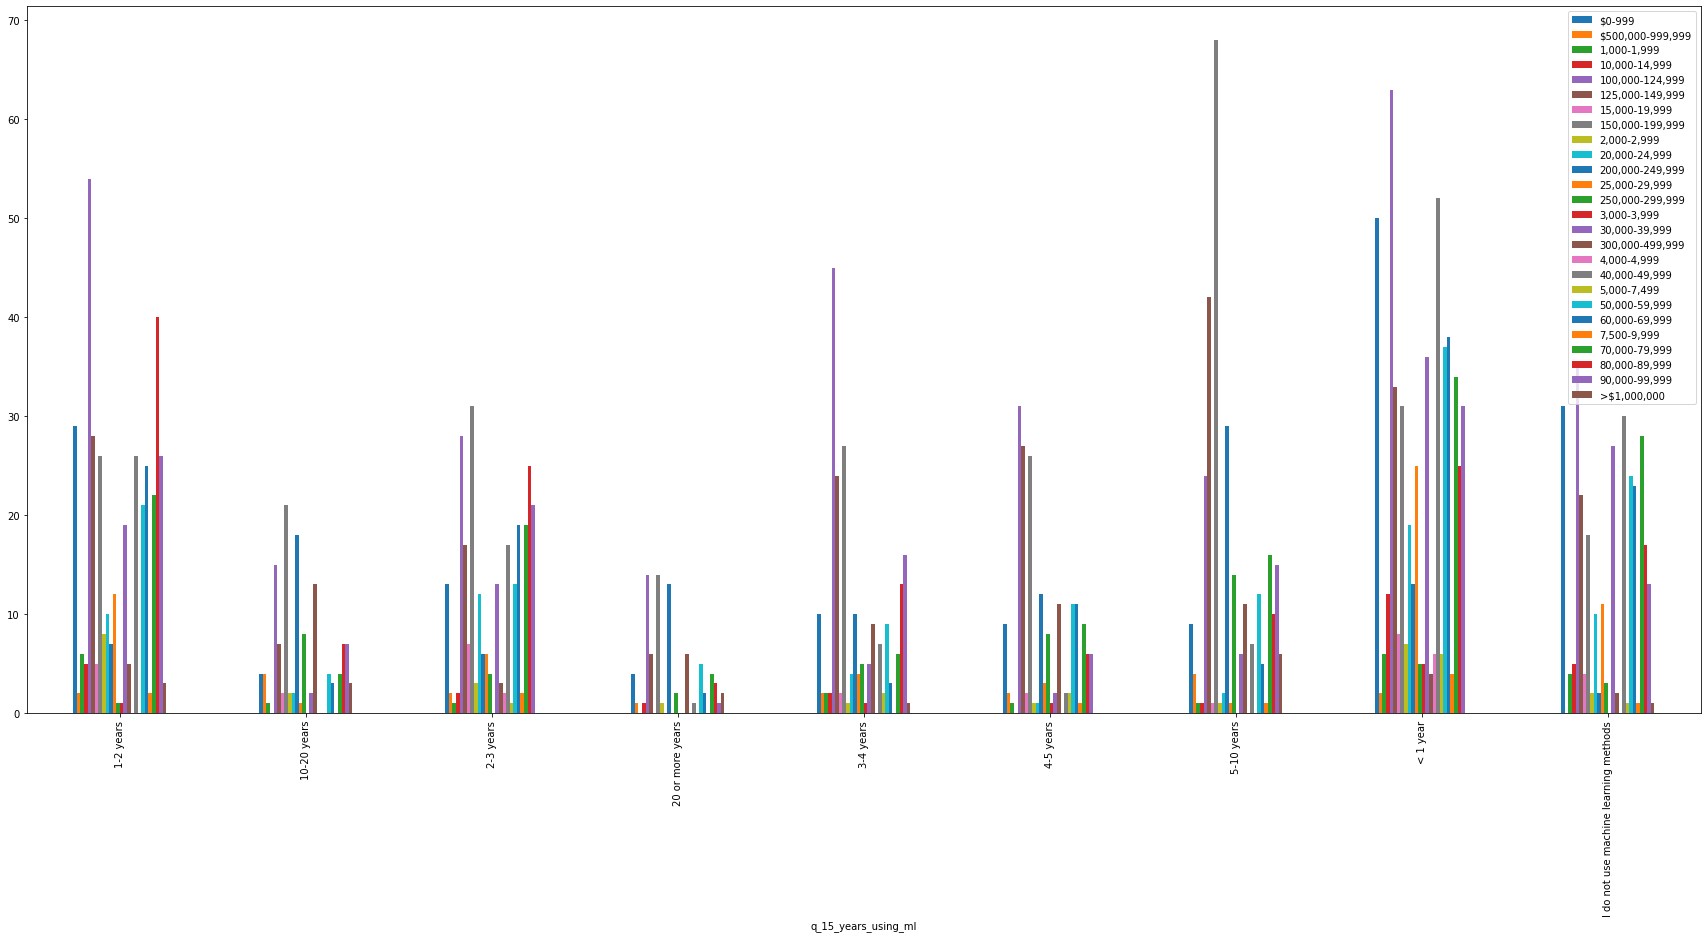

In [30]:
crosstab2.plot.bar(figsize=(30,13));
plt.legend()

In [26]:
# Para reducir datos, vamos a extraer los rangos de salario más frecuentes
lista_salarios_freq = list(df_sal_freq['q_25_yearly_compensation'].unique())
lista_salarios_freq.pop() # Para eliminar el ultimo unique "others"
lista_salarios_freq

['150,000-199,999',
 '100,000-124,999',
 '40,000-49,999',
 '$0-999',
 '125,000-149,999',
 '80,000-89,999',
 '60,000-69,999',
 '50,000-59,999',
 '30,000-39,999',
 '70,000-79,999',
 '90,000-99,999',
 '200,000-249,999',
 '25,000-29,999',
 '20,000-24,999']

In [27]:
# Subset filtrado por los salarios más habituales
df_salarios_freq = df_salarios.loc[(df_salarios['q_25_yearly_compensation'].isin(lista_salarios_freq)), ['q3_country', 'q_15_years_using_ml', 'q_25_yearly_compensation']]
df_salarios_freq.head()

,q3_country,q_15_years_using_ml,q_25_yearly_compensation
49,United States of America,4-5 years,"100,000-124,999"
51,United States of America,I do not use machine learning methods,"70,000-79,999"
69,United Kingdom of Great Britain and Northern I...,< 1 year,"50,000-59,999"
80,United States of America,5-10 years,"200,000-249,999"
87,United States of America,1-2 years,"70,000-79,999"


In [28]:
df_salarios_freq.shape

(2242, 3)

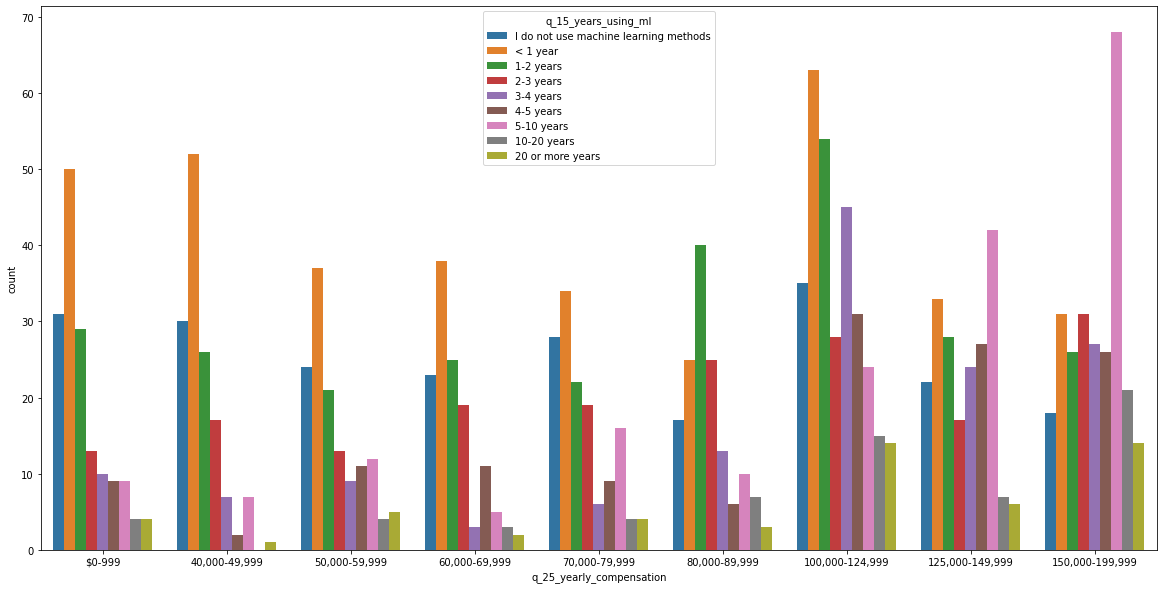

In [29]:
# Gráfico en el que visualizar los salarios en funcion de la experiencia en ML
plt.figure(figsize=(20,10))
sns.countplot(x= 'q_25_yearly_compensation', data = df_salarios_freq, hue= 'q_15_years_using_ml', order= ['$0-999', '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '100,000-124,999', '125,000-149,999', '150,000-199,999'], hue_order = ['I do not use machine learning methods', '< 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years', '10-20 years', '20 or more years'] );

>##### Conclusión: los salarios no dependen de la experiencia en ML
>* Vemos que no hay un patrón, ya que `independientemente de la experiencia` que se tenga se puede ganar más o menos en todos los rangos.
>* Vemos también con el value counts que `lo más frecuente` es que los encuestados ganen entre `100.000-120.000$`, entre `125,000-149,999$`, y entre `150.000-200.000$`.
>* Vemos con el freq tab que lo más habitual es **150,000-199,999$ con experiencia de 5-10 años** y **100,000-124,999$ con experiencia de < 1 year** 